In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
dataset = pd.read_csv('Gender_Inequality_Index.csv')

In [3]:
# Selecting features (columns B to G) and the target variable (last column)
X = dataset.iloc[:, 1:7].values
y = dataset.iloc[:, -1].values

In [4]:
# Handling categorical data with One-Hot Encoding (adjust if categorical columns exist)
categorical_features = [0]
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

X = column_transformer.fit_transform(X)


In [5]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# Creating and training the Simple Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
# Making predictions
y_pred = regressor.predict(X_test)


In [8]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [9]:
# Output results
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 3.577212128264203e-14
R-squared: 0.9999999999991589


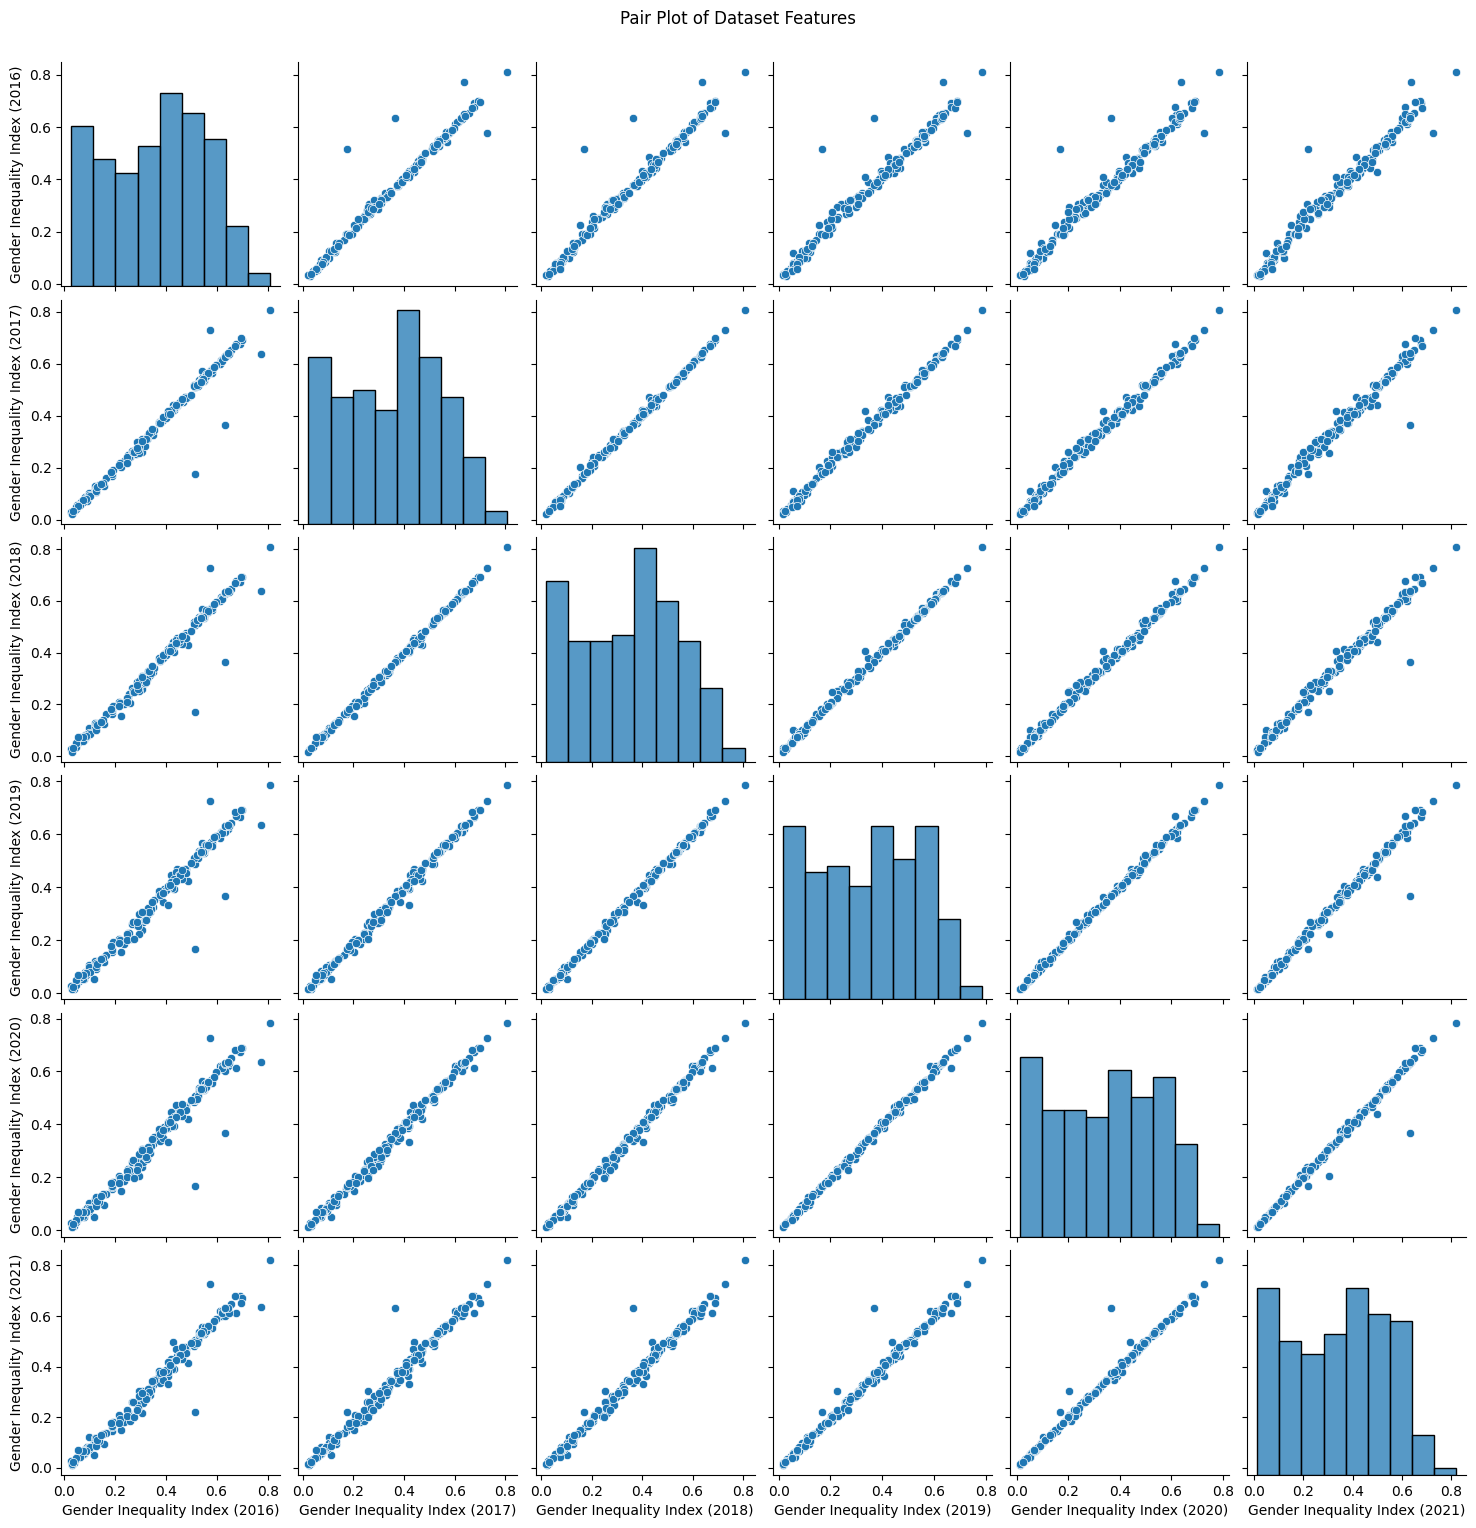

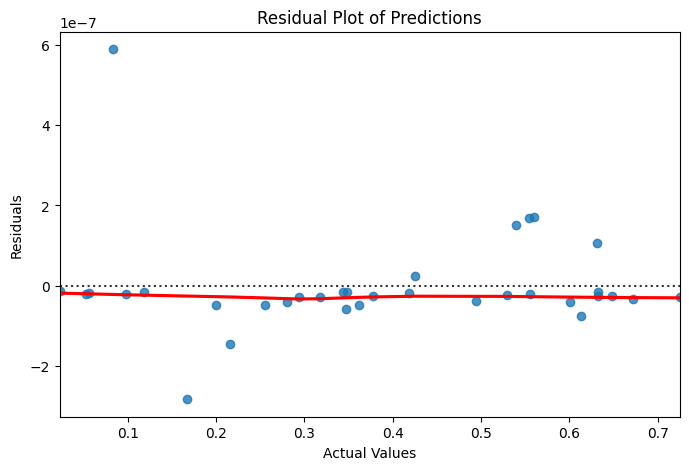

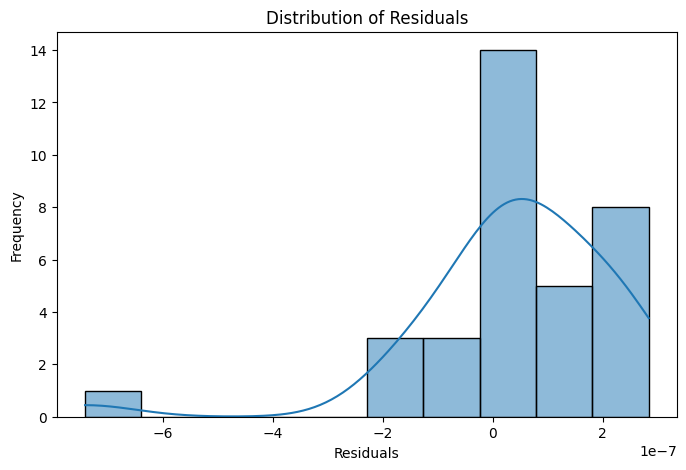

In [11]:
# Visualizations

# 1. Pair Plot of the original dataset (before encoding)
sns.pairplot(dataset)
plt.suptitle("Pair Plot of Dataset Features", y=1.02)
plt.show()

# 2. Residual Plot - checks for patterns in residuals (errors)
plt.figure(figsize=(8, 5))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red'})
plt.title("Residual Plot of Predictions")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

# 3. Distribution of Residuals - to check if residuals are normally distributed
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()